In [3]:
from sympy.interactive.session import init_printing
import numpy as np
import pandas as pd
import sympy as sy
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import integrate

# 1) Circuito RLC

$$\epsilon(t)=L\frac{di}{dt}+Ri $$

In [4]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04]) #s
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24]) #A
L = 0.98 #H
R = 0.142 #ohms

tabla=pd.DataFrame({'t':t,'i':i})
tabla

,t,i
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [5]:
il=interpolate.lagrange(t,i)

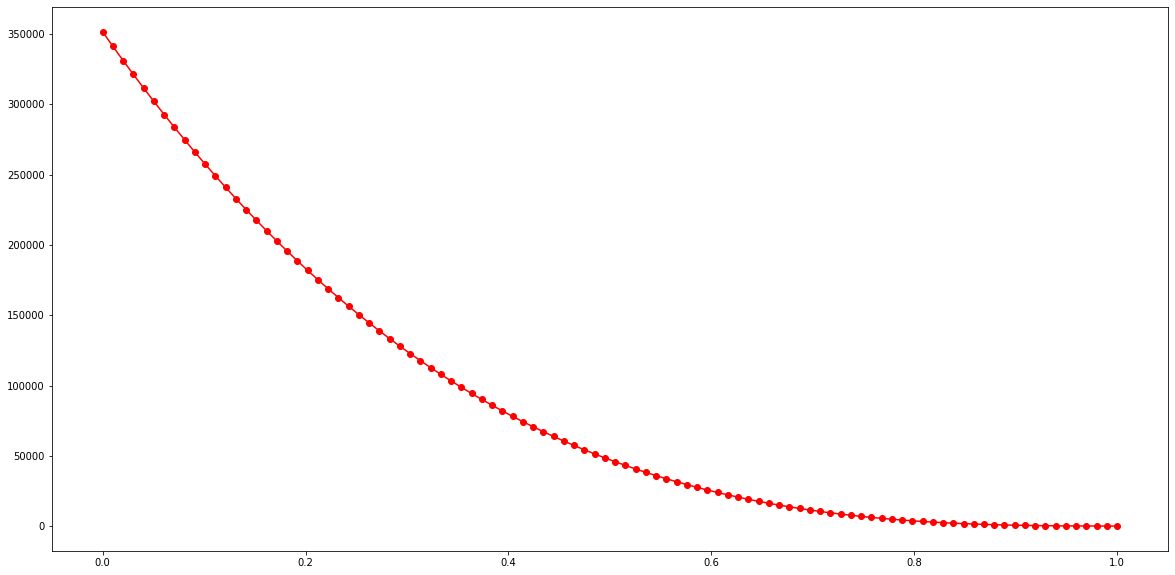

3.4220016924738883

In [6]:
def der(f,x0,h=1e-10):
  return (f(x0+h)-f(x0))/h

ia=np.linspace(0,1,100)

ϵ= lambda ia:L*der(il,ia)+R*ia

plt.figure(figsize=(20,10))
plt.plot(ia,ϵ(ia),'o-r')
plt.show()

ϵ(1)

# 1) Parte 2
## Métodos

## Regla del trapecio.

1. Se genera un arreglo de n intervalos entre los límites de la integral.
2. Se evalúa la función en ambos extremos de cada intervalo.
3. Se calcula el área de cada trapecio con:
$$A=\frac{h}{2}(B+b)$$  

4. El valor de la integral definida es la suma del área de cada trapecio.

## Regla de Simpson.

1. Se hace una interpolación de Lagrange en n puntos sobre la función.
2. Se calcula la integral del polinomio resultado de la interpolación.
3. Este valor se puede aproximar al valor de la inegral con cierta cota de error.


## Método de Cuadratura

1. Se genera un areglo de n intervalos entre los límites de la integral.  
2. Se calcula la altura promedio del rectángulo por:

$$h=\frac{f(x_2)-f(x_1)}{2}$$

3. Se calcula al área de cada rectángulo.
4. El valor de la integral definida es la suma del área de cada rectángulo.

## Integrales definidas
$$\int_{0}^{\pi/2} \frac{1}{\sqrt{\tan{x}}} \mathrm{d}x$$

In [21]:
g1 = lambda x: 1/np.sqrt(np.tan(x))
i1 = np.linspace(0.01,np.pi/2,10000)
a1=integrate.quad(g1,0,np.pi/2)[0] # Cuadratura
b1=integrate.trapz(g1(i1),i1) # Trapecio
c1=integrate.simps(g1(i1),i1) # Simpson
a1,b1,c1

(2.2214414690792026, 2.0214427456011403, 2.0214419045632375)

$$\int_{-\infty}^{\infty} \! \frac{1}{1+x^2} \mathrm{d}x$$

In [31]:
g2 = lambda x: 1/(1+x**2)
i2=np.linspace(-1000,1000,10000)
a2=integrate.quad(g2,np.NINF,np.inf)[0]
b2=integrate.trapz(g2(i2),i2)
c2=integrate.simps(g2(i2),i2)
a2,b2,c2

(3.141592653589793, 3.1395926542429824, 3.1395926542563215)

$$\int_{0}^{\pi/4}\int_{\sin{x}}^{\cos{x}} \! (2y\sin{x}+\cos^2{x})\mathrm{d}x\mathrm{d}y$$

In [33]:
xi=np.linspace(0,np.pi/4,100)
yi=np.zeros(len(xi))
for i in range(len(yi)):
  g3=lambda y: 2*y*np.sin(xi[i])+np.cos(xi[i])**2
  yi[i]=integrate.quad(g3,np.sin(xi[i]),np.cos(xi[i]))[0]

b3=integrate.trapz(yi,xi)
c3=integrate.simps(yi,xi)

b3,c3

(0.5118335093392186, 0.5118445718953842)

$$\int_{e}^{2e}{\frac{1}{\ln{x}}}\mathrm{d}x$$

In [39]:
g4=lambda x: 1/np.log(x)
i3=np.linspace(np.e,2*np.e,1000)
a4=integrate.quad(g4,np.e,2*np.e)[0]
b4=integrate.trapz(g4(i3),i3)
c4=integrate.simps(g4(i3),i3)
a4,b4,c4

(2.0038105616240243, 2.003810749013251, 2.0038105619858713)

## Integrales elípticas

###1)

$$K(m)=\int_0^{\pi/2}\frac{\mathrm{d}\phi}{\sqrt{1-m\sin^2\phi}}$$

In [42]:
a0=1.3862944
b0=.5
a1=.1119723
b1=.2113478
a2=.00725296
b2=.0288729
ϵ=3e-5

In [57]:
mi=np.linspace(0.01,0.99,100)
ϕi=np.linspace(0.01,np.pi/2,100)
K=np.zeros(len(mi))
apr=np.zeros(len(mi))
dif=np.zeros(len(mi))

for i in range(len(mi)):

  m1=1-mi[i]

  k=lambda ϕ: 1/np.sqrt(1-mi[i]*np.sin(ϕ)**2)

  K[i]=integrate.simps(k(ϕi),ϕi)

  apr[i]=a0+a1*m1+a2*m1-(b0+b1*m1+b2*m1**2)*np.log(m1)+ϵ

  dif[i]=abs(K[i]-apr[i])

dfK=pd.DataFrame({'m':mi,'K(m)':K,'Aproximación':apr,'Diferencia':dif})
dfK

,m,K(m),Aproximación,Diferencia
0,0.010000,1.564746,1.511770,0.052976
1,0.019899,1.568699,1.517948,0.050751
2,0.029798,1.572698,1.524148,0.048551
3,0.039697,1.576743,1.530370,0.046374
4,0.049596,1.580835,1.536615,0.044221
...,...,...,...,...
95,0.950404,2.902231,2.925860,0.023629
96,0.960303,3.009776,3.031514,0.021738
97,0.970202,3.149137,3.168750,0.019614
98,0.980101,3.346569,3.363759,0.017190


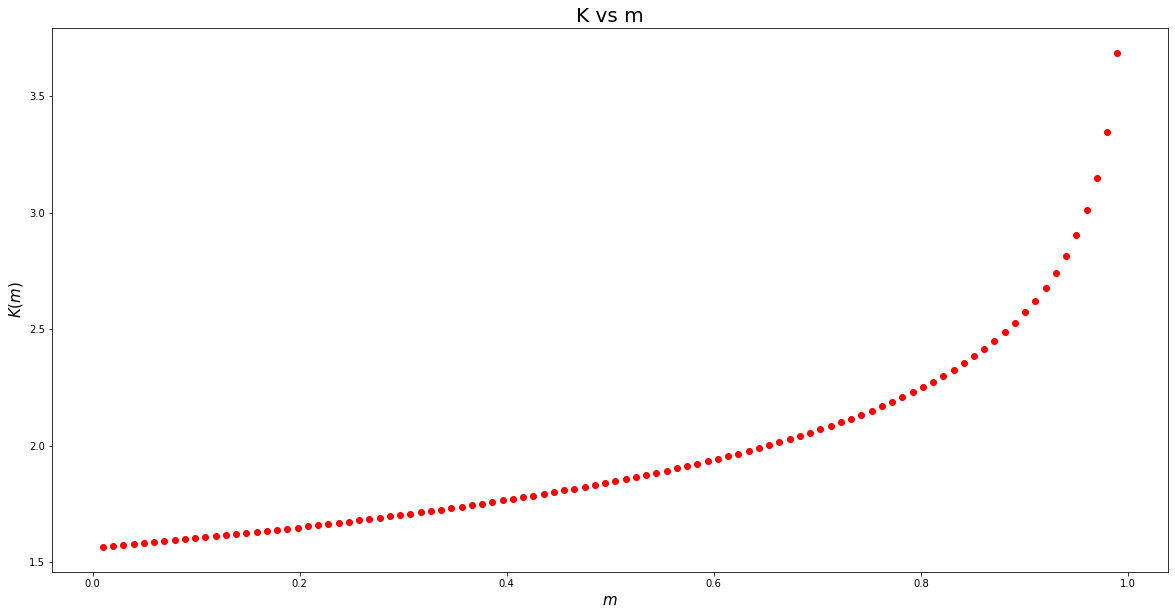

In [54]:
plt.figure(figsize=(20,10))
plt.title('K vs m',size=20)
plt.xlabel('$m$',size=15)
plt.ylabel('$K(m)$',size=15)
plt.plot(mi,K,'or')
plt.show()

### 2)
$$A_{\phi}(r,{\theta})=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin{\theta}}}(\frac{(2-k^2)K(k)-2E(k)}{k^2})$$  
$$k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}$$  
$$E(k)=\int_0^{\pi/2}\sqrt{1-k^2\sin^2{\phi}}\mathrm{d}\phi$$  
$$K(k)=\int_0^{\pi/2}\frac{\mathrm{d}\phi}{\sqrt{1-k^2\sin^2{\phi}}}$$

In [58]:
a = I = cons = 1 

### Para $r$=1.1

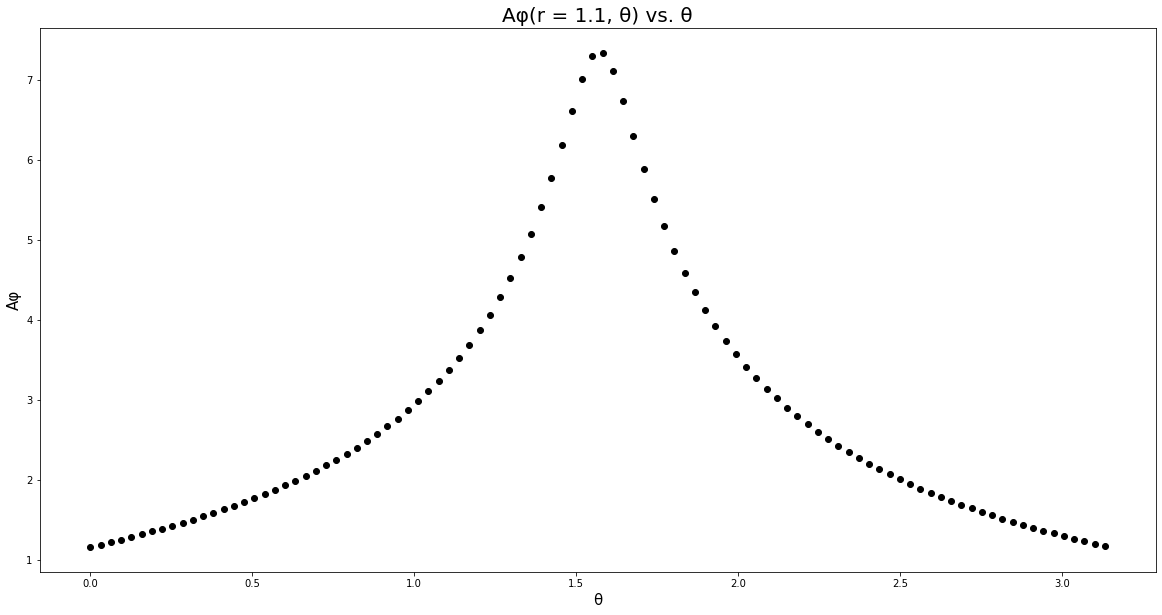

In [66]:
r = 1.1
θ = np.linspace(.001,np.pi-.01,100)

def k21(θ):
  return (4*a*r*np.sin(θ))/(a**2+r**2+2*a*r*np.sin(θ))

k21=k21(θ)

ϕ = np.linspace(0,np.pi/2,100)

E = np.zeros(len(θ)); K = np.zeros(len(θ))

for i in range(len(E)):
  f1 = lambda ϕ: np.sqrt(1-k21[i]*np.sin(ϕ))
  f2 = lambda ϕ: 1/np.sqrt(1-k21[i]*np.sin(ϕ))
  E[i] = integrate.simps(f1(ϕ),ϕ)
  K[i] = integrate.simps(f2(ϕ),ϕ)

A = cons*(4*I*a)/(np.sqrt(a**2+r**2+2*a*r*np.sin(θ)))*((2-k21)*K-2*E)/k21

plt.figure(figsize=(20,10))
plt.title('Aφ(r = 1.1, θ) vs. θ',size=20)
plt.xlabel('θ', size=15)
plt.ylabel('Aφ', size=15)
plt.plot(θ,A,'ok')
plt.show()

### Para $\theta$=$\frac{\pi}{3}$

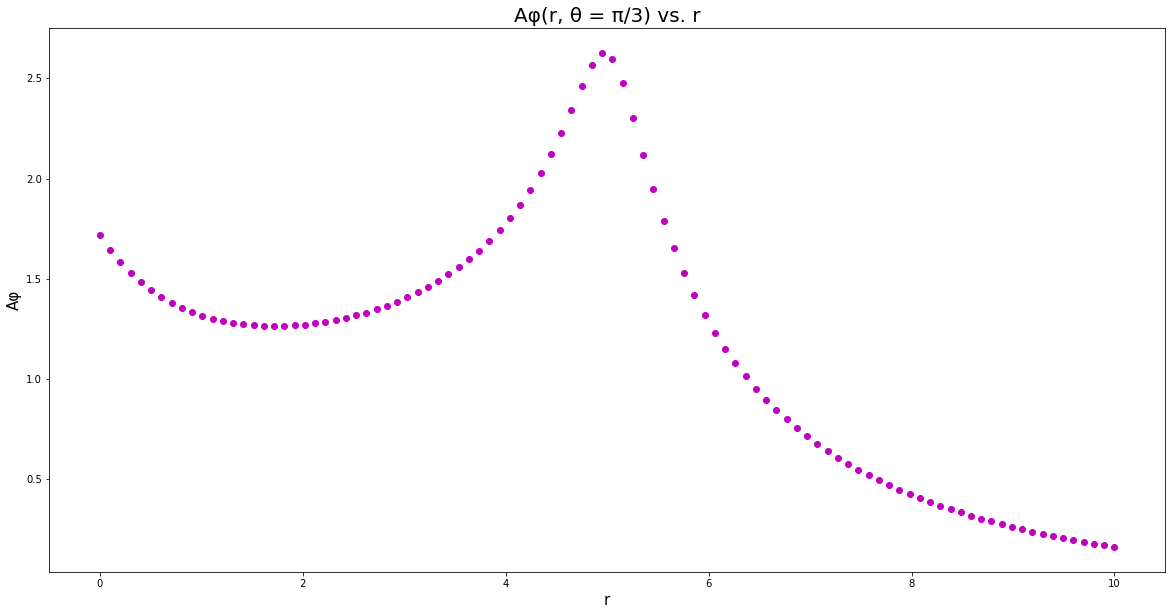

In [70]:
r2 = np.linspace(0.001,10,100)
θ2 = np.pi/3

def k22(r):
  return (4*a*r*np.sin(θ))/(a**2+r**2+2*a*r*np.sin(θ))

k22=k22(r2)

E2 = np.zeros(len(θ)); K2 = np.zeros(len(θ))

for i in range(len(E2)):
  f1 = lambda ϕ: np.sqrt(1-k22[i]*np.sin(ϕ))
  f2 = lambda ϕ: 1/np.sqrt(1-k22[i]*np.sin(ϕ))
  E2[i] = integrate.simps(f1(ϕ),ϕ)
  K2[i] = integrate.simps(f2(ϕ),ϕ)

A2 = cons*(4*I*a)/(np.sqrt(a**2+r2**2+2*a*r2*np.sin(θ2)))*((2-k21)*K-2*E)/k21

plt.figure(figsize=(20,10))
plt.title('Aφ(r, θ = π∕3) vs. r',size=20)
plt.xlabel('r', size=15)
plt.ylabel('Aφ', size=15)
plt.plot(r2,A2,'om')
plt.show()

## Exponencial

$$\int_0^1{e^{-t}}\mathrm{d}t$$

In [74]:
fe = lambda x: np.exp(-x)
ie = np.linspace(0,1,1000)
cs=integrate.simps(fe(ie),ie)

In [73]:
def cuadratura(f,a,b,n):
   
    x=np.linspace(a,b,n+1)
    y=f(x)

    return 0.5*((x[1:]-x[:-1])*(y[1:]+y[:-1])).sum()

ce=cuadratura(fe,0,1,100)

In [75]:
def trapecio(f,a,b,n):
  
  x=np.linspace(a,b,n+1)
  y=f(x)

  h=x[1]-x[0]
  
  return h/2*(y[1:]+y[:-1]).sum()

te=trapecio(fe,0,1,100)

In [77]:
def simpson(f,a,b,n=10):

  x=np.linspace(a,b,n)
  y=f(x)

  y1= interpolate.lagrange(x,y)

  return cuadratura(y1,a,b,n)

se=simpson(fe,0,1)

In [83]:
met=['Cuadratura','Trapecio','Simpson']
val=np.array([ce,te,se])
error=abs(cs-val)

dfe=pd.DataFrame({'Método':met,'Valor':val,'Error':error})
dfe

,Método,Valor,Error
0,Cuadratura,0.632126,0.000005
1,Trapecio,0.632126,0.000005
2,Simpson,0.632647,0.000527
